# <font color='blue'>Análise exploratória dos dados</font>

## Montando DRIVE

Corrigir, pelo professor, a próxima célula para o destino correto do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/UFSB/Componentes_curriculares/RNA/_02_Regressao/' # Colocar uma barra no final do endereço

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Importando bibliotecas

Importar as bibliotecas e o arquivo que serão utilizadas durante as análises. 

In [ ]:
# Imports bilbliotecas básica
# ===========================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Imports bilbliotecas com funções importantes
# ============================================
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2) Extrai os dados do csv ou txt
Um dos grandes problemas que encontramos é mal uso de separador e de encoding, então é importante se atentar a esses argumentos.

É muito importante ressaltar que colocar os argumentos de separador e de encoding quando está lendo um arquivo evita problemas como os dados que não tenham sido separados corretamente.

Fonte dos dados: Dados pre-processados.

In [ ]:
# Carregando o dataset
dataset = pd.read_csv(drive_dados + "Dados_pre_processados.csv", encoding = 'latin-1', sep = ',')
dataset.drop(columns = ["Unnamed: 0"], inplace=True)
# Verificando as primeiras linhas do dataset
print(dataset.shape)
dataset.head(5)

(1005, 9)


,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075


Note que não utilizamos o encoding utf-8, pois com o seu uso podemos ter apenas de 0-127 valores, portanto utilzamos o latin-1, que também é conhecido como ISO-8859–1, e que cobre de 0–255 valores.

## 3) Definindo variáveis contínuas e categóricas (Exceto a saída)
Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. 

Trataremos todas as variáveis com menos de 10 entradas únicas como categóricas.

In [ ]:
# Verificando Valores Únicos
dataset.nunique()

Cimento (X1)                            280
Escoria de alto-forno (X2)              187
Cinzas (X3)                             163
Agua (X4)                               205
Superplastificante (X5)                 155
Agregado grosso (X6)                    284
Agregado fino (X7)                      304
Idade (X8)                               14
Forca de compressao do Concreto (Y1)    938
dtype: int64

### 3.1) Dividindo o dataset entre variáveis continuas e categoricas e separando as colunas vinculadas a variável target

In [ ]:
# Preparando os dados para a separação entre variáveis contínuas e categóricas
n_entradas = 5

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas menos as colunas relacionadas ao target
targets = ['Forca de compressao do Concreto (Y1)']
columns = [elemento for elemento in dataset.columns if elemento not in targets]
for c in columns:
    if dataset.nunique()[c] >= n_entradas:
        continuous.append(c)
    else:
        categorical.append(c)

#### 3.1.1) Variáveis contínuas

In [ ]:
print(f'{len(continuous)} de {dataset.shape[1]-len(targets)} variáveis de preditoras foram classificadas como continuas no dataset.')
dataset[continuous].head()

8 de 8 variáveis de preditoras foram classificadas como continuas no dataset.


,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0


#### 3.1.2) Variáveis categóricas

In [ ]:

print(f'{len(categorical)} de {dataset.shape[1]-len(targets)} variáveis preditoras foram classificadas como categóricas no dataset.')
dataset[categorical].head()

0 de 8 variáveis preditoras foram classificadas como categóricas no dataset.


""
0
1
2
3
4


### 3.2) Mudando variáveis de classes (contínua/categórica)

In [ ]:
# Remove variáveis da classe continua
val_remove = ["Idade (X8)"]
for classe in val_remove:
    if(classe in continuous):
        continuous.remove(classe)
        categorical.append(classe)
    
# Variáveis continuas
dataset[continuous].head()

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


## 4) Análise das variáveis contínuas

### 4.1) Análise BoxPlot

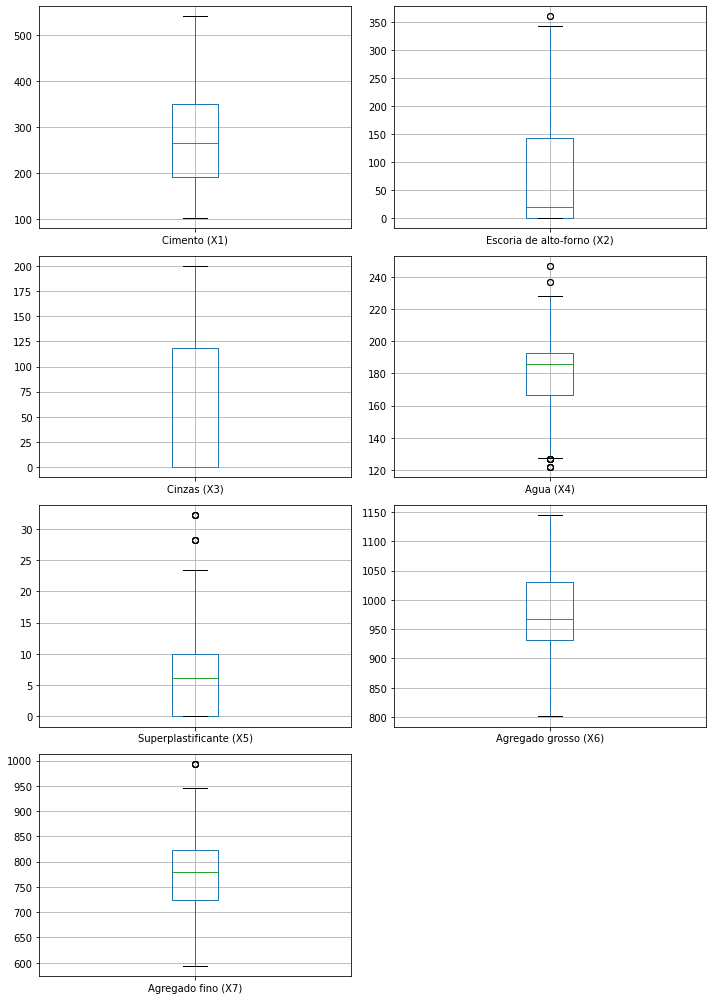

In [ ]:
# Definido faixa de variáveis que serão analisadas
inicio = 0
total_variáveis = len(continuous)

# Tamanho da área de plotagem
fig = plt.figure(figsize = (10,total_variáveis*2))


# Loop pelas variáveis contínuas
for i, col in enumerate(continuous[inicio:inicio+total_variáveis]):
    plt.subplot(int(total_variáveis/2)+1, 2, i + 1);
    dataset.boxplot(col);
    plt.tight_layout()
    
plt.savefig('boxplot1.png')

#### 4.1.1) Removendo outliers

In [ ]:
# Mostra colunas do dataset
dataset.columns

Index(['Cimento (X1)', 'Escoria de alto-forno (X2)', 'Cinzas (X3)',
       'Agua (X4)', 'Superplastificante (X5)', 'Agregado grosso (X6)',
       'Agregado fino (X7)', 'Idade (X8)',
       'Forca de compressao do Concreto (Y1)'],
      dtype='object')

In [ ]:
# identificando outiliers de uma coluna
column = 'Superplastificante (X5)'
y=dataset[column]
removed_outliers = ~y.between(y.quantile(.05), y.quantile(.95))
index_names = dataset[removed_outliers].index # INVERT removed_outliers!!
print(f'Devem ser removidos {len(index_names)} outliers que estão nos seguintes indices:')
print(index_names) # The resulting dates to drop.
print(removed_outliers.value_counts())

Devem ser removidos 51 outliers que estão nos seguintes indices:
Int64Index([ 72,  73,  74,  76,  78,  83,  86,  90,  91,  92,  94,  96, 101,
            104, 109, 110, 111, 113, 115, 120, 123, 127, 128, 129, 131, 133,
            138, 141, 145, 146, 147, 149, 151, 155, 158, 364, 367, 368, 369,
            805, 808, 809, 810, 861, 866, 924, 929, 962, 965, 966, 967],
           dtype='int64')
False    954
True      51
Name: Superplastificante (X5), dtype: int64


In [ ]:
# Removendo linhas com outliers
# O comando só terá efeito com inplace=True
dataset.drop(index_names, inplace=True)

 #### 4.1.2) Caso variáveis contínuas pareçam extremamente distorcidas. 
 
 Aplica-se transformação de log para melhor visualização.

In [ ]:
# Transformação de log nas variáveis contínuas
dataset_log = np.log1p(1 + dataset[continuous])

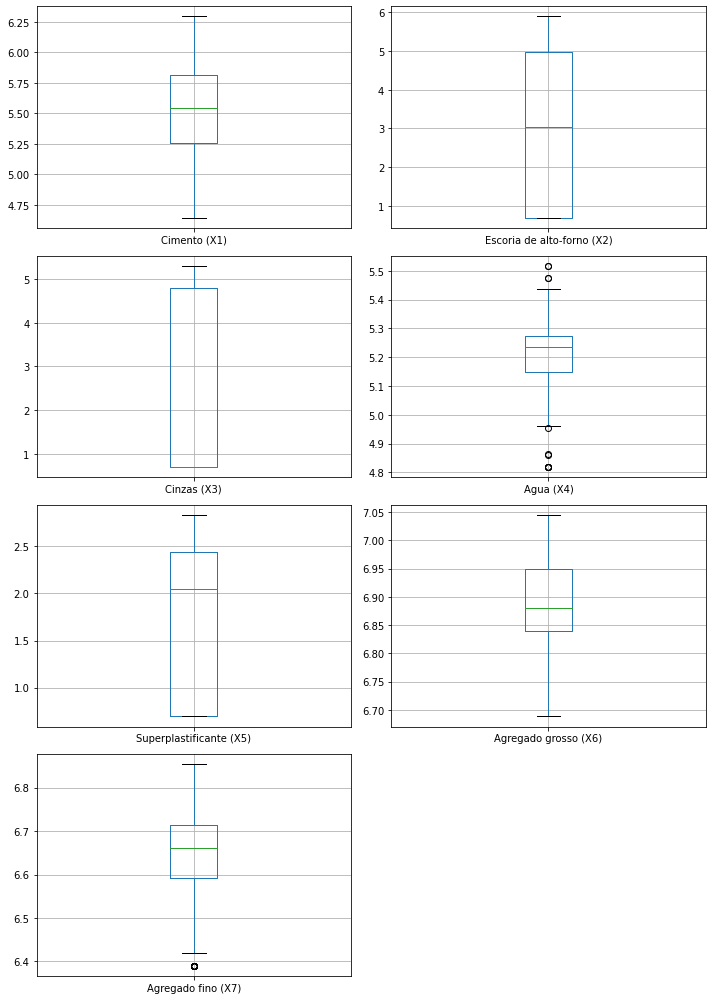

In [ ]:
# Definido faixa de variáveis que serão analisadas
inicio = 0
total_variáveis = len(continuous)

# Tamanho da área de plotagem
fig = plt.figure(figsize = (10,total_variáveis*2))


# Loop pelas variáveis contínuas
for i, col in enumerate(continuous[inicio:inicio+total_variáveis]):
    plt.subplot(int(total_variáveis/2)+1, 2, i + 1);
    dataset_log.boxplot(col);
    plt.tight_layout()
    
plt.savefig('boxplot2.png')

### 4.2) Matriz de Correlação Entre Variáveis Contínuas.

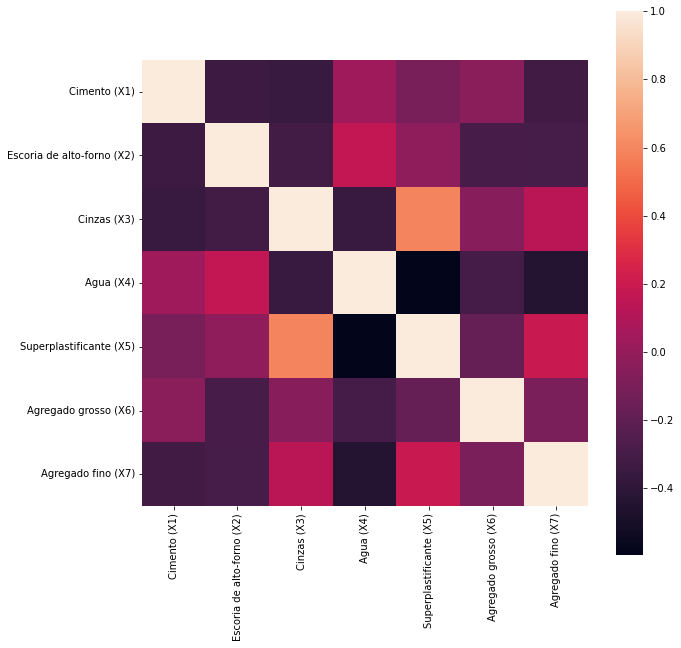

In [ ]:
# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação 
sns.heatmap(dataset[continuous].corr(), vmax = 1., square = True)

## 5) Análise das variáveis categóricas

### 5.1) Visualização da distribuição em uma categoria especifica

In [ ]:
# Variáveis categóricas
dataset[categorical].head()

,Idade (X8)
0,28.0
1,28.0
2,270.0
3,365.0
4,360.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


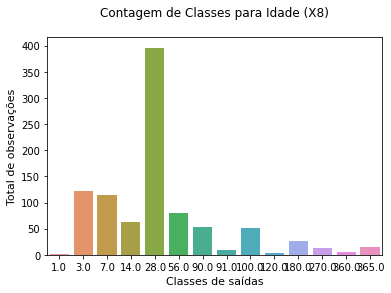

In [ ]:
# Countplot variavel categoria especifica
var_considerada = 'Idade (X8)'
sns.countplot(dataset[var_considerada])
plt.xlabel('Classes de saídas', fontsize = 11)
plt.ylabel('Total de observações', fontsize = 11)
plt.title(f'Contagem de Classes para {var_considerada}\n')
plt.show()

### 5.2) Analisando a distribuição de uma variável especifica em uma classe

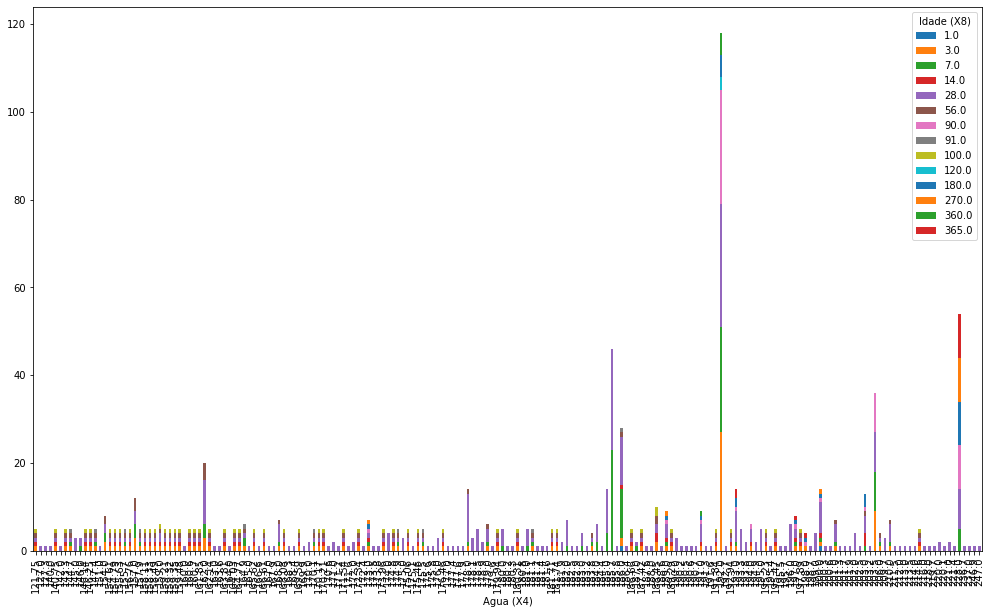

In [ ]:
# Stacked Bar Tipo de Variável x sub conjunto
var_comparada = 'Agua (X4)'
pd.crosstab(dataset[var_comparada], dataset[var_considerada]).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (17, 10), 
                                                   )

## 6) Aplica encoder em todas as variáveis categoricas

In [ ]:
# Cria o encoder para as variáveis categóricas
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
for var in categorical:
    dataset.loc[:,var] = lb.fit_transform(dataset[var])

# Verificando valores missing
print(dataset.isna().sum())

Cimento (X1)                            0
Escoria de alto-forno (X2)              0
Cinzas (X3)                             0
Agua (X4)                               0
Superplastificante (X5)                 0
Agregado grosso (X6)                    0
Agregado fino (X7)                      0
Idade (X8)                              0
Forca de compressao do Concreto (Y1)    0
dtype: int64


In [ ]:
# Remove valores missing eventualmente gerados
# O comando só terá efeito com inplace=True
dataset.dropna(inplace = False)

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,13,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,12,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,4,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,4,32.768036


In [ ]:
# Verificando Valores Únicos
dataset.nunique()

Cimento (X1)                            270
Escoria de alto-forno (X2)              178
Cinzas (X3)                             149
Agua (X4)                               191
Superplastificante (X5)                 136
Agregado grosso (X6)                    274
Agregado fino (X7)                      288
Idade (X8)                               14
Forca de compressao do Concreto (Y1)    894
dtype: int64

In [ ]:
# Variáveis categóricas após encoder
dataset[categorical]

,Idade (X8)
0,4
1,4
2,11
3,13
4,12
...,...
1000,4
1001,4
1002,4
1003,4


## 7) Recomposição da base de dados

In [ ]:
dataset.columns

Index(['Cimento (X1)', 'Escoria de alto-forno (X2)', 'Cinzas (X3)',
       'Agua (X4)', 'Superplastificante (X5)', 'Agregado grosso (X6)',
       'Agregado fino (X7)', 'Idade (X8)',
       'Forca de compressao do Concreto (Y1)'],
      dtype='object')

In [ ]:
# Define variáveis de entrada
column_label_end = ['Forca de compressao do Concreto (Y1)']
columns_input = [elemento for elemento in dataset.columns if elemento not in column_label_end]

X = dataset[columns_input]
y = dataset[column_label_end]

X_res = X
y_res = y

In [ ]:
columns = [elemento for elemento in dataset.columns if not elemento in column_label_end]
dados_input = pd.DataFrame(X_res, columns = columns)

In [ ]:
columns = column_label_end
dados_target = pd.DataFrame(y_res)

In [ ]:
dataset = pd.concat([dados_input, dados_target], axis=1) # Reconstroi pands (dados)
dataset

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,13,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,12,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,4,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,4,32.768036


## 8)  Estatistica

In [ ]:
dataset.describe() 

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,274.074004,70.765252,55.983176,183.704350,5.226420,976.801205,771.586216,4.204403,34.564864
std,101.623784,86.907278,63.802431,20.421696,4.762997,76.126947,77.991580,2.508149,15.933357
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,0.000000,2.331808
25%,190.425000,0.000000,0.000000,170.100000,0.000000,932.000000,727.700000,2.250000,23.159499
50%,254.500000,19.000000,0.000000,185.700000,5.750000,970.200000,779.320000,4.000000,33.419246
75%,333.000000,141.300000,118.270000,193.000000,9.520000,1040.000000,821.000000,5.000000,44.190930
max,540.000000,359.400000,200.100000,247.000000,15.000000,1145.000000,945.000000,13.000000,81.751169


In [ ]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = np.ravel(dataset[column_label_end].mean())
valor_medio_esperado_na_previsao

array([34.56486369])

In [ ]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.
var_output = len(column_label_end)
squared_errors = []
for i in range(var_output):
    squared_errors.append(pd.Series(valor_medio_esperado_na_previsao[i] - dataset[column_label_end[i]])**2)
    SSE = np.sum(squared_errors)
    print ('Soma dos Quadrados dos Erros (SSE) da variável %s: %01.f' % (column_label_end[i],SSE))

Soma dos Quadrados dos Erros (SSE) da variável Forca de compressao do Concreto (Y1): 241940


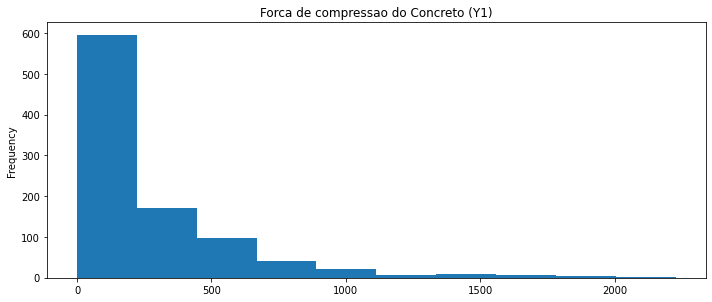

In [ ]:
# Histograma dos erros das variáveis targets.
# Tamanho da área de plotagem
fig = plt.figure(figsize = (10,8))

for i in range(var_output):
    plt.subplot(var_output+1, 1, i + 1);
    hist_plot = squared_errors[i].plot(kind='hist')
    plt.title(column_label_end[i])
    plt.tight_layout()

## 9)  Correlação entre as variáveis

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
dataset.corr()

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
Cimento (X1),1.000000,-0.338341,-0.357396,0.031716,-0.105114,-0.042147,-0.315618,0.046120,0.455328
Escoria de alto-forno (X2),-0.338341,1.000000,-0.310233,0.165676,-0.020612,-0.289499,-0.299585,-0.044468,0.082211
Cinzas (X3),-0.357396,-0.310233,1.000000,-0.355349,0.594299,-0.048542,0.135554,-0.073066,-0.038930
Agua (X4),0.031716,0.165676,-0.355349,1.000000,-0.594544,-0.304292,-0.444677,0.220365,-0.218460
Superplastificante (X5),-0.105114,-0.020612,0.594299,-0.594544,1.000000,-0.176306,0.195236,-0.112819,0.293300
Agregado grosso (X6),-0.042147,-0.289499,-0.048542,-0.304292,-0.176306,1.000000,-0.099444,-0.015356,-0.113365
Agregado fino (X7),-0.315618,-0.299585,0.135554,-0.444677,0.195236,-0.099444,1.000000,-0.137635,-0.233027
Idade (X8),0.046120,-0.044468,-0.073066,0.220365,-0.112819,-0.015356,-0.137635,1.000000,0.501870
Forca de compressao do Concreto (Y1),0.455328,0.082211,-0.038930,-0.218460,0.293300,-0.113365,-0.233027,0.501870,1.000000


## 9.1) Avalia considerando uma das (ou a única)  variável de saida

In [ ]:
# Considerada apenas uma saída
# Confirmar necessidade de adicionar uma constante unitária na entrada e 
var_saida = 'Forca de compressao do Concreto (Y1)'
Xc = sm.add_constant(X)
modelo = sm.OLS(y[var_saida], Xc) #  modelo = sm.OLS(y[var_saida], X) #  
modelo_v1 = modelo.fit()

In [ ]:
modelo_v1.summary()
# https://stats.idre.ucla.edu/stata/output/regression-analysis/

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Forca de compressao do Concreto (Y1)   R-squared:                       0.737
Model:                                              OLS   Adj. R-squared:                  0.735
Method:                                   Least Squares   F-statistic:                     331.0
Date:                                  Wed, 06 Oct 2021   Prob (F-statistic):          6.08e-268
Time:                                          21:25:31   Log-Likelihood:                -3357.2
No. Observations:                                   954   AIC:                             6732.
Df Residuals:                                       945   BIC:                             6776.
Df Model:                                             8                                         
Covariance Type:                              nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -23.0540     21.434     -1.076      0.282     -65.117      19.009
Cimento (X1)                   0.1172      0.007     16.755      0.000       0.103       0.131
Escoria de alto-forno (X2)     0.0955      0.008     11.452      0.000       0.079       0.112
Cinzas (X3)                    0.0618      0.011      5.875      0.000       0.041       0.082
Agua (X4)                     -0.1639      0.032     -5.121      0.000      -0.227      -0.101
Superplastificante (X5)        0.5735      0.094      6.121      0.000       0.390       0.757
Agregado grosso (X6)           0.0135      0.008      1.802      0.072      -0.001       0.028
Agregado fino (X7)             0.0175      0.009      1.982      0.048       0.000       0.035
Idade (X8)                     3.7295      0.110     33.930      0.000       3.514       3.945
==============================================================================
Omnibus:                       12.888   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.173
Skew:                           0.004   Prob(JB):                     2.53e-05
Kurtosis:                       3.730   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 10) Recomposição da base de dados

In [ ]:
dataset.columns

Index(['Cimento (X1)', 'Escoria de alto-forno (X2)', 'Cinzas (X3)',
       'Agua (X4)', 'Superplastificante (X5)', 'Agregado grosso (X6)',
       'Agregado fino (X7)', 'Idade (X8)',
       'Forca de compressao do Concreto (Y1)'],
      dtype='object')

In [ ]:
# Definir variáveis de entrada
column_label_end = ['Forca de compressao do Concreto (Y1)']
columns_input = [elemento for elemento in dataset.columns if elemento not in column_label_end]


X = dataset[columns_input]
y = dataset[column_label_end]

X_res = X
y_res = y

In [ ]:
columns = [elemento for elemento in dataset.columns if not elemento in column_label_end]
dados_input = pd.DataFrame(X_res, columns = columns)

In [ ]:
columns = column_label_end
dados_target = pd.DataFrame(y_res, columns = columns)

In [ ]:
dataset = pd.concat([dados_input, dados_target], axis=1) # Reconstroi pands (dados)
dataset.shape

(954, 9)

## 11) Salvar dataset após resultado da análise exploratória

In [ ]:
dataset.to_csv(drive_dados + 'Dados_analise_exploratoria.csv', index = True)
dataset

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8),Forca de compressao do Concreto (Y1)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,13,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,12,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,4,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,4,32.768036
